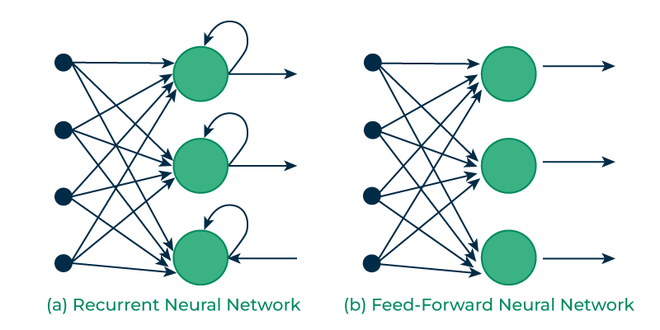

**Types of RNN**

1. One to One
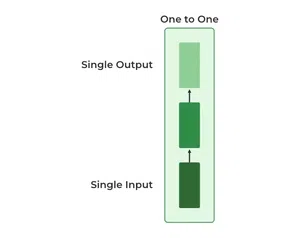
2. One to Many  
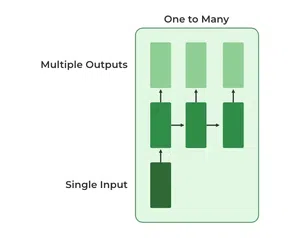
3. Many to One  
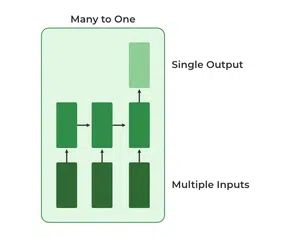
4. Many to Many
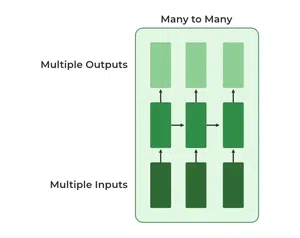

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [12]:
text = 'Edunet Foundation is helping bridge the skill deficit that the country is facing,  working to leverage and realize the mammoth potential of India’s young population. Focus is to provide opportunities to all, irrespective of location, gender, religion or socio-economic constraints.'

chars = sorted(list(set(text)))

char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

In [13]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text)-seq_length):
  seq = text[i:i+seq_length]
  label = text[i+seq_length]
  sequences.append([char_to_index[char] for char in seq])
  labels.append(char_to_index[label])


In [14]:
X = np.array(sequences)
y = np.array(labels)

X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

In [15]:
# RNN Model build

model = Sequential()

model.add(SimpleRNN(50, input_shape = (seq_length, len(chars)), activation = 'relu'))

model.add(Dense(len(chars), activation='softmax'))

In [16]:
# model compile
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# model train

model.fit(X_one_hot, y_one_hot, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 3.4185 - accuracy: 0.0180
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 3.3527 - accuracy: 0.0647
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 3.2936 - accuracy: 0.1079
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 3.2247 - accuracy: 0.1547
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 3.1430 - accuracy: 0.1691
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 3.0424 - accuracy: 0.1583
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 2.9397 - accuracy: 0.1619
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 2.8606 - accuracy: 0.1583
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 2.7913 - accuracy: 0.1942
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 2.7424 - accuracy: 0.2050
Epoch 11/200
9/9 [===========

In [19]:
# text = 'Edunet Foundation is helping bridge the skill deficit that the country is facing,
# working to leverage and realize the mammoth potential of India’s young population.
# Focus is to provide opportunities to all, irrespective of location, gender, religion or socio-economic constraints.'

start_seq = "Focus is to "
generated_text = start_seq

for i in range(50):
  x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
  x_one_hot = tf.one_hot(x, len(chars))
  prediction = model.predict(x_one_hot)
  next_index = np.argmax(prediction)
  next_char = index_to_char[next_index]
  generated_text += next_char

print("Generated Text:")
print(generated_text)




1/1 [==============================] - 0s 21ms/step
Generated Text:
Focus is to provide of India’s yountry is to provide of India’
